# Quickstart guide

Simple example of using the pig iron production prediction system.

In [1]:
import sys
sys.path.append('..')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from src import data_loader as dl
from src import feature_engineering as fe
from src.model import GPRModel
from src import utils

## 1. Load data

In [2]:
# Set your data path
DATA_PATH = "G:/My Drive/Documents/Applications/DBX Commodities 2025/Stage 2 Assignment/Data/Gijon"

# Load production data
production = dl.load_production_data(DATA_PATH)
print(f"Production data: {production.shape}")
production.head()

Production data: (24, 1)


,Value
Date,
2022-01-01,343
2022-02-01,285
2022-03-01,344
2022-04-01,292
2022-05-01,344


## 2. Extract features (sample)

In [3]:
# Load sample thermal data
sample_date = "20220119"
thermal_data = dl.load_thermal_index(DATA_PATH, "TAI", sample_date)
cloud_mask = dl.load_cloud_mask(DATA_PATH, sample_date)
perimeter_mask = dl.load_perimeter_mask(DATA_PATH)

# Extract features
if thermal_data is not None:
    features = fe.extract_thermal_features(
        thermal_data, perimeter_mask, cloud_mask, "TAI"
    )
    print("Extracted features:")
    for key, value in list(features.items())[:5]:
        print(f"  {key}: {value:.3f}")

Extracted features:
  TAI_clear_mean: -0.057
  TAI_clear_max: 30.126
  TAI_clear_p95: 0.064
  TAI_clear_p99: 1.827
  TAI_clear_pixels: 34373.000


## 3. Train GPR model (quick demo)

In [4]:
# Create dummy data for demo
np.random.seed(42)
n_samples = 24
X = np.random.randn(n_samples, 5)
y = 250 + X[:, 0] * 30 + X[:, 1] * 20 + np.random.randn(n_samples) * 10

# Create and train GPR model
model = GPRModel()
model.fit(X, y)
print("Model trained!")

# Make predictions
y_pred, y_std = model.predict(X)

# Evaluate
metrics = model.evaluate(X, y)
print("\nModel performance:")
for metric, value in metrics.items():
    print(f"  {metric}: {value:.3f}")

Model trained!

Model performance:
  rmse: 7.288
  r2: 0.958
  mae: 5.689
  coverage_95: 1.000


## 4. Visualise predictions

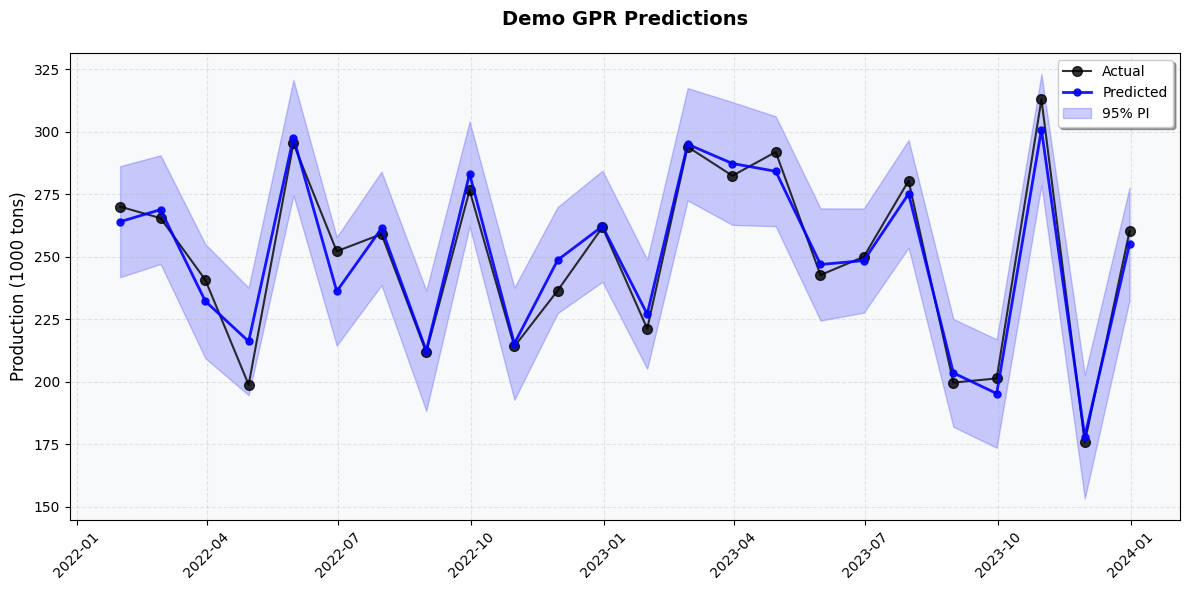

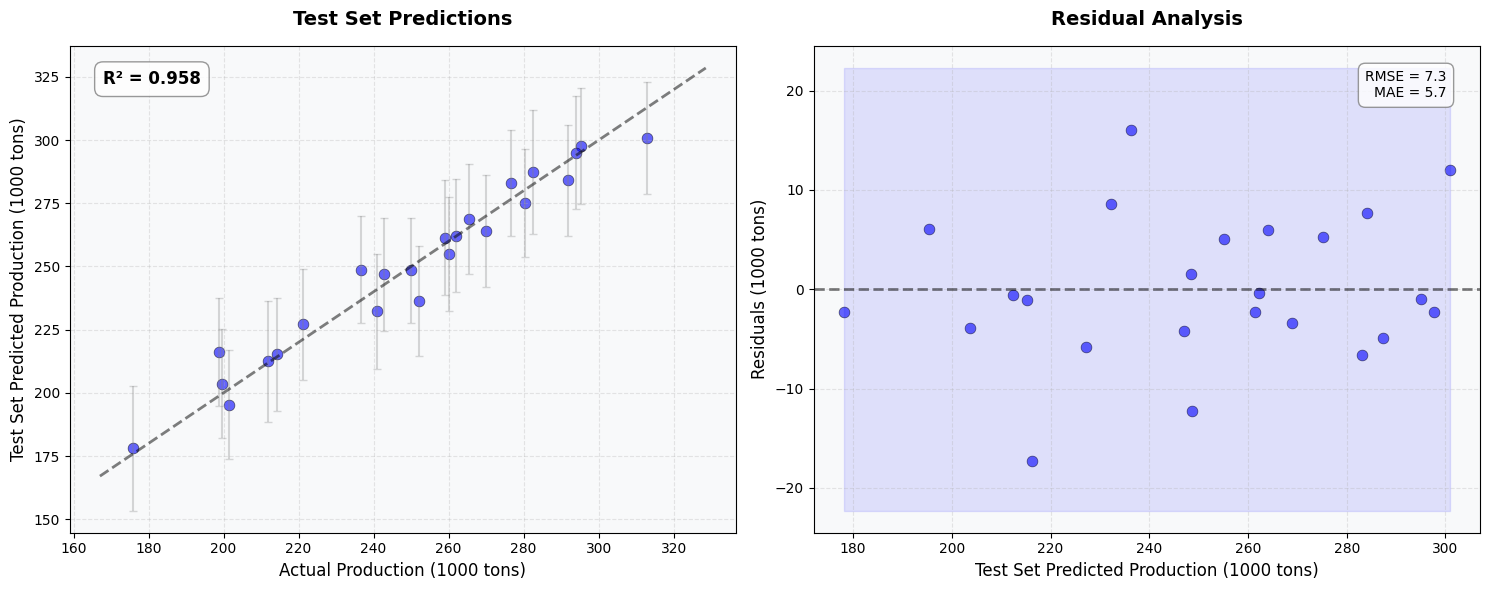

In [5]:
# Create date index for visualisation
dates = pd.date_range('2022-01', periods=n_samples, freq='ME')

# Plot predictions
fig = utils.plot_predictions(dates, y, y_pred, y_std,
                            title="Demo GPR Predictions")
plt.show()

# Actual vs predicted
fig = utils.plot_actual_vs_predicted(y, y_pred, y_std)
plt.show()

## Run full pipeline

To run the complete analysis:

```bash
python ../src/main.py --data-path "path/to/data"
```

This will:
1. Extract features from all thermal indices
2. Handle cloud contamination
3. Create monthly aggregates
4. Train GPR model
5. Generate predictions with uncertainty
6. Save all results to `./results/`